# Number of clones bar graph

In [1]:
import scanpy as sc
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: 

In [ ]:
DATA_PATH = "/placodes/data"

In [ ]:
# Load data
adata = sc.read_h5ad(f"{DATA_PATH}/anndatas/cranial_placodal_reannotated.h5ad")

In [4]:
# Get simplified annotation into adata
adata.obs.new_annotation.unique().tolist()

['Forebrain, TelA',
 'Hindbrain',
 'Mesenchyme',
 'Unmature neurons',
 'Medullary hindbrain',
 'Forebrain, peduncular hypothalmus',
 'Diencephalon',
 'Hindbrain floor',
 'Forebrain, terminal hypothalmus',
 'Midbrain',
 'Forebrain',
 'Trigeminal ganglia neurons',
 'Olfactory epithelium',
 'Neural progenitors',
 'Unknown mesenchyme',
 'Retina pigmented epithelium',
 'SCP',
 'Frontnasal process epithelium',
 'Boundary cap',
 'Retinal mitotic progenitors',
 'Skin epithelium',
 'Satellite SCP',
 'Vomeronasal epithelium',
 'Optic cup neuroectoderm',
 'Olfactory neurons',
 'Lens',
 'NC-derived eye melanocyte',
 'Vestibular and spiral ganglia neurons',
 'Pioneer olfactory neruons',
 'Primary palate epithelium',
 'Immune cells',
 'Epibranchial epithelium',
 'Otic vesicle epithlium',
 'Epibranchial neurons',
 'Vestibular ganglia neurons',
 'Adenohypophyseal cells',
 'Glial cells',
 'Retina',
 'Epibranchial-derived neurons']

In [ ]:
# Create simplified annotation
# Create mapping dict for the new annotaitons with the new_annotation as map
to_df_dict = {"Adenohypophyseal cells":"Neurogenic placode",
              "Boundary cap":"Neural crest", 
              "Diencephalon": "CNS",
              "Epibranchial-derived neurons": "Neurogenic placode", 
              "Epibranchial neurons": "Neurogenic placode",
              "Forebrain": "CNS",
              "Forebrain, TelA": "CNS",
              "Forebrain, peduncular hypothalmus": "CNS",
              "Forebrain, terminal hypothalmus": "CNS",
              "Glial cells": "Neural crest",
              "Hindbrain": "CNS",
              "Hindbrain floor": "CNS",
              "Immune cells": "Immune cells",
              "Sensory neural progenitors": "Neural crest", 
              "Lens": "Neurogenic placode", 
              "Olfactory neurons": "Neurogenic placode",
              "Pioneer olfactory neurons": "Neurogenic placode",
              "Medullary hindbrain": "CNS",
              "Mesenchyme": "Mesenchyme",
              "Midbrain": "CNS",
              "NC-derived eye melanocyte": "Neural crest", 
              "Olfactory epithelium": "Neurogenic placode",
              "Frontnasal process epithelium":"Skin",
              "Otic vesicle epithlium": "Neurogenic placode", 
              
              "Primary palate epithelium": "Skin",
              "Epibranchial epithelium":"Neurogenic placode",
              "Retina": "CNS",
              "Retina pigmented epithelium": "Neural crest", 
              "Retinal mitotic progenitors": "CNS",
              "SCP": "Neural crest", 
              "Satellite Glia": "Neural crest", 
              
              "Trigeminal ganglia neurons": "Neurogenic placode", 
              
              "Unknown mesenchyme": "Mesenchyme", 
              "Epidermis":"Skin",
              "CNS Inmature neurons": "CNS", 
              "Vestibular and spiral ganglia neurons": "Neurogenic placode",
              "Optic cup neuroectoderm": "CNS", 
              "Vestibular ganglia neurons": "Neurogenic placode",
              "Vomeronasal epithelium": "Neurogenic placode",
             }
                


In [6]:
# Check if anything is missing
for ct in adata.obs.new_annotation.unique().tolist():
    if ct not in to_df_dict:
        print(ct)
        
print()
for ct in to_df_dict:
    if ct not in adata.obs.new_annotation.unique().tolist():
        print(ct)


In [7]:
# Give annotation
map_dict={}
for x in to_df_dict:
    map_dict[str(x)] = to_df_dict[x]
del to_df_dict
adata.obs['Simplified Annotation'] = adata.obs['new_annotation'].map(map_dict)


In [8]:
print("#NaN:",adata[adata.obs["Simplified Annotation"] == "NaN"].shape[0])

#NaN: 0


In [9]:
cts = adata.obs["Simplified Annotation"].unique().tolist()

In [10]:
# Remove some so that it does not become crazy big
cts.remove("Immune cells")

In [11]:
cts

['CNS',
 'Neural crest derivatives',
 'Trigeminal ganglia (mixed)',
 'Neurogenic placode derivatives',
 'Skin']

In [12]:
from itertools import combinations
l=[]
for i in range(len(cts)):
    l.append(list(combinations(cts, i+1)))

In [13]:
tot=0
for x in l:
    tot+=len(x)
print(tot)

31


In [ ]:
print("1:", len(l[0]))
print("2:", len(l[1]))
print("3:", len(l[2]))
print("4:", len(l[3]))
print("5:", len(l[4]))

1: 5
2: 10
3: 10
4: 5
5: 1


In [15]:
clone_ids = adata.obs.clone_id.unique().tolist()
clone_ids.remove("NA")

In [16]:
l

[[('CNS',),
  ('Neural crest derivatives',),
  ('Trigeminal ganglia (mixed)',),
  ('Neurogenic placode derivatives',),
  ('Skin',)],
 [('CNS', 'Neural crest derivatives'),
  ('CNS', 'Trigeminal ganglia (mixed)'),
  ('CNS', 'Neurogenic placode derivatives'),
  ('CNS', 'Skin'),
  ('Neural crest derivatives', 'Trigeminal ganglia (mixed)'),
  ('Neural crest derivatives', 'Neurogenic placode derivatives'),
  ('Neural crest derivatives', 'Skin'),
  ('Trigeminal ganglia (mixed)', 'Neurogenic placode derivatives'),
  ('Trigeminal ganglia (mixed)', 'Skin'),
  ('Neurogenic placode derivatives', 'Skin')],
 [('CNS', 'Neural crest derivatives', 'Trigeminal ganglia (mixed)'),
  ('CNS', 'Neural crest derivatives', 'Neurogenic placode derivatives'),
  ('CNS', 'Neural crest derivatives', 'Skin'),
  ('CNS', 'Trigeminal ganglia (mixed)', 'Neurogenic placode derivatives'),
  ('CNS', 'Trigeminal ganglia (mixed)', 'Skin'),
  ('CNS', 'Neurogenic placode derivatives', 'Skin'),
  ('Neural crest derivatives',
 

In [ ]:
res_dict={}
for clone_id in tqdm(clone_ids):
    clone_ad = adata[adata.obs.clone_id==clone_id]
    present_cts = clone_ad.obs["Simplified Annotation"].unique().tolist()

    for itr in l:
        for comb in itr:
            jump=0
            for c in comb:
                if c not in present_cts:
                    jump=1
                elif len(comb) != len(present_cts):
                    jump=1

            if jump == 1:
                continue


            comb = str(comb)[1:-1]
            comb = comb.replace("'", "")

            if comb in res_dict:
                res_dict[comb] += 1 
            else:
                res_dict[comb] = 1 

100%|██████████| 8727/8727 [01:02<00:00, 140.13it/s]


In [38]:
res_dict = {k: v for k, v in sorted(res_dict.items(), key=lambda item: item[1], reverse=True)}

In [ ]:

presence_data = {}
for ct in cts:
    presence_data[ct] = []
for comb in reversed(list(res_dict.keys())):
    for ct in presence_data.keys():
        if ct in comb.split(", "):
            presence_data[ct].append(1)
        elif ct in comb.split(","): # I added this to catch the clones present in only one celltype
            presence_data[ct].append(1)
        else:
            presence_data[ct].append(0)

In [ ]:
# To reverse the dotplot with largest at bottom
tmp_=[]
for x in presence_data:
    print(x)
    presence_data[x] = list(reversed(presence_data[x]))

CNS
Neural crest derivatives
Trigeminal ganglia (mixed)
Neurogenic placode derivatives
Skin


In [47]:
presence_data

{'CNS': [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0],
 'Neural crest derivatives': [0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1],
 'Trigeminal ganglia (mixed)': [0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0],
 'Neurogenic placode derivatives': [0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1],
 'Skin': [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]}

In [ ]:
categories = list(res_dict.keys())
clone_counts = [res_dict[x] for x in res_dict]
clone_counts = clone_counts # Large at bottom

cell_types = cts

In [ ]:
# Set font globally
plt.rcParams.update({
    'font.family': 'serif', # Font family
    'font.serif': ['Arial'], # Specific font
})

/tmp/ipykernel_6891/213200130.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


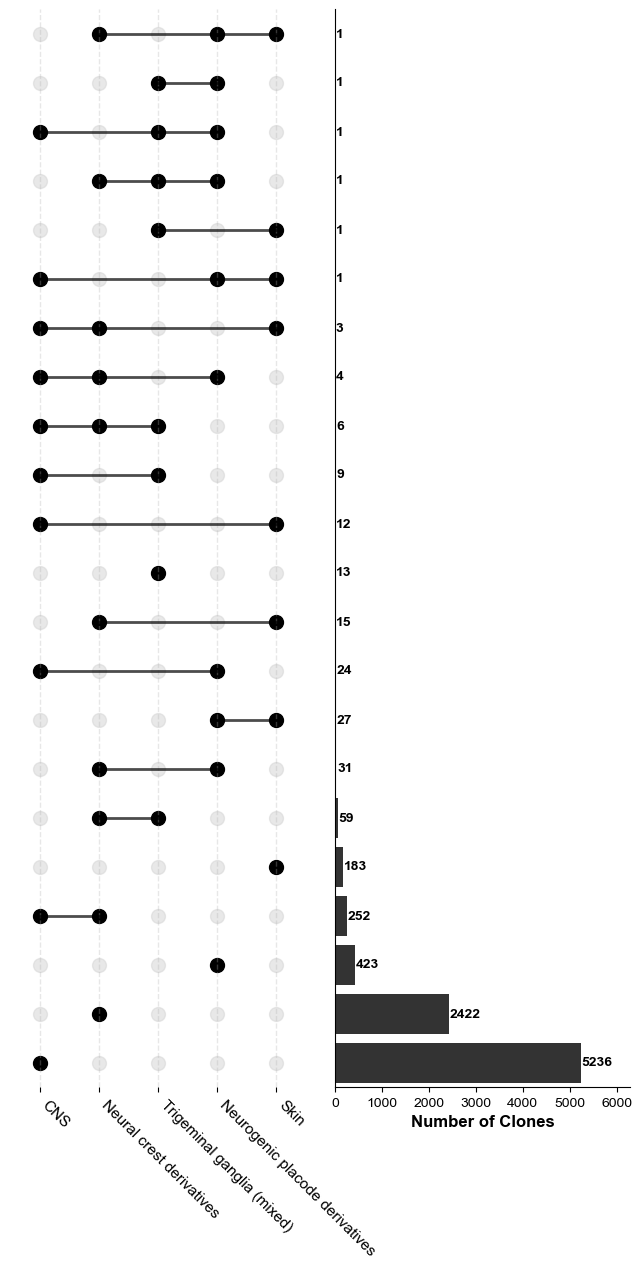

In [ ]:
# Create figure with subplots (rotated 90 degrees, dot plot on left)
fig = plt.figure(figsize=(8, 14))

# Create grid for subplots - side by side, dot plot first
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1], wspace=0.1)

# Left subplot - Dot plot
ax1 = fig.add_subplot(gs[0])

# Create dot plot (rotated)
x_positions = np.arange(len(cell_types))
dot_size = 100

for i, cell_type in enumerate(cell_types):
    for j, category in enumerate(categories):
        if presence_data[cell_type][j] == 1:
            # Filled dot
            ax1.scatter(i, j, s=dot_size, c='black', marker='o')
        else:
            # Empty dot (light gray outline)
            ax1.scatter(i, j, s=dot_size, c='lightgray', marker='o', alpha=0.5)

# Add connecting lines between some dots (rotated pattern)
for j in range(len(categories)):
    active_positions = []
    for i, cell_type in enumerate(cell_types):
        if presence_data[cell_type][j] == 1:
            active_positions.append(i)
    
    # Draw lines connecting active dots
    if len(active_positions) > 1:
        for k in range(len(active_positions) - 1):
            ax1.plot([active_positions[k], active_positions[k+1]], [j, j], 
                    'k-', linewidth=2, alpha=0.7)

# Customize left plot (dot plot)
ax1.set_xticks(range(len(cell_types)))
ax1.set_xticklabels(cell_types, rotation=-45, ha='left', fontsize=11)



ax1.set_yticks(range(len(categories)))
ax1.set_yticklabels(categories, fontsize=10)

ax1.set_xlim(-0.5, len(cell_types) - 0.5)
ax1.set_ylim(-0.5, len(categories) - 0.5)
ax1.set_yticks([])  # Remove y-axis labels for right plot



# Remove spines
for spine in ax1.spines.values():
    spine.set_visible(False)

# Add grid
ax1.grid(True,
         alpha=0.3,
         linewidth=1,
         linestyle='--')


# Right subplot - Bar chart (horizontal bars)
ax2 = fig.add_subplot(gs[1])
bars = ax2.barh(range(len(categories)), clone_counts, color='black', alpha=0.8)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, clone_counts)):
    ax2.text(bar.get_width() + 20, bar.get_y() + bar.get_height()/2, 
             str(count), ha='left', va='center', fontsize=10, fontweight='bold')

ax2.set_xlabel('Number of Clones', fontsize=12, fontweight='bold')



ax2.set_xlim(0, max(clone_counts) * 1.2)
ax2.set_ylim(-0.5, len(categories) - 0.5)
ax2.set_yticks([])  # Remove y-axis labels for right plot
ax2.spines['left'].set_visible(True)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)



plt.tight_layout()
plt.savefig("figures/nr_of_clones_bar_and_dot.svg", dpi=300, transparent=True)
plt.show()